In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/updated-netflix-stock-price-all-time/netflix.csv
/kaggle/input/netflix-rise/MW-FM980_netfli_20170522210252_ZH.jpg


In [2]:
df = pd.read_csv('/kaggle/input/updated-netflix-stock-price-all-time/netflix.csv')
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [3]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4862.000000,4862.000000,4862.000000,4862.000000,4.862000e+03,4862.000000
mean,105.036246,101.825886,103.452571,103.490876,1.684950e+07,103.490876
std,156.486273,151.882243,154.217491,154.260935,1.938885e+07,154.260935
min,0.410714,0.346429,0.377857,0.372857,2.856000e+05,0.372857
25%,3.971786,3.831429,3.892857,3.897143,6.324600e+06,3.897143
50%,21.167143,20.409286,20.690000,20.834286,1.087205e+07,20.834286
75%,126.184998,122.419998,124.300003,124.132504,2.021372e+07,124.132504
max,615.599976,596.549988,606.469971,606.710022,3.234140e+08,606.710022


Let us check if we have any missing values

In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

High correlation is observed just like expected

In [5]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

<img src="https://ei.marketwatch.com/Multimedia/2017/05/22/Photos/ZH/MW-FM980_netfli_20170522210252_ZH.jpg?uuid=8bee2706-3f53-11e7-8476-9c8e992d421e" alt="">

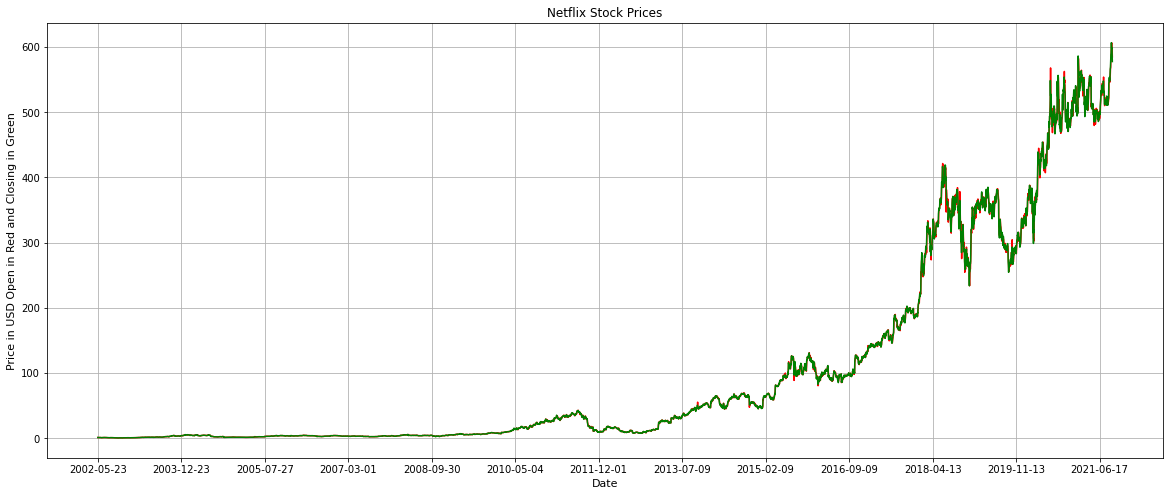

In [6]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Open'], color='Red')
ax.plot(df['Date'], df['Close'], color='Green')

ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD Open in Red and Closing in Green', fontsize='11')
plt.title('Netflix Stock Prices')
plt.grid()
plt.show()

In [7]:
df['year'] = pd.DatetimeIndex(df['Date']).year
mean_high_over_yrs = df.groupby('year') \
       .agg({'High':'mean'}) \
       .rename(columns={'High':'High_mean'}) \
       .reset_index()

mean_low_over_yrs = df.groupby('year') \
       .agg({'Low':'mean'}) \
       .rename(columns={'Low':'Low_mean'}) \
       .reset_index()

We could see we dont have any big changes between closing and opening

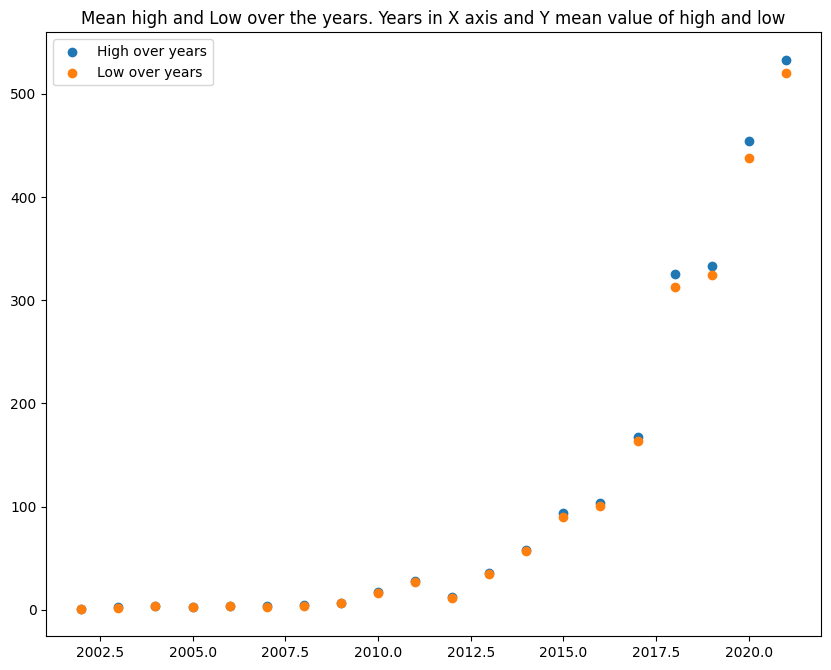

In [8]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(mean_high_over_yrs['year'], mean_high_over_yrs['High_mean'], label='High over years')
plt.scatter(mean_low_over_yrs['year'], mean_low_over_yrs['Low_mean'], label='Low over years')

# Plot
plt.title('Mean high and Low over the years. Years in X axis and Y mean value of high and low')
plt.legend()
plt.show()


We could see some disparity post 2015 otherwise we could only see High and low overshadowing each other